Weighted mean = 4.403107 ± 0.033695  (chi2/ndof = 7.04/3)


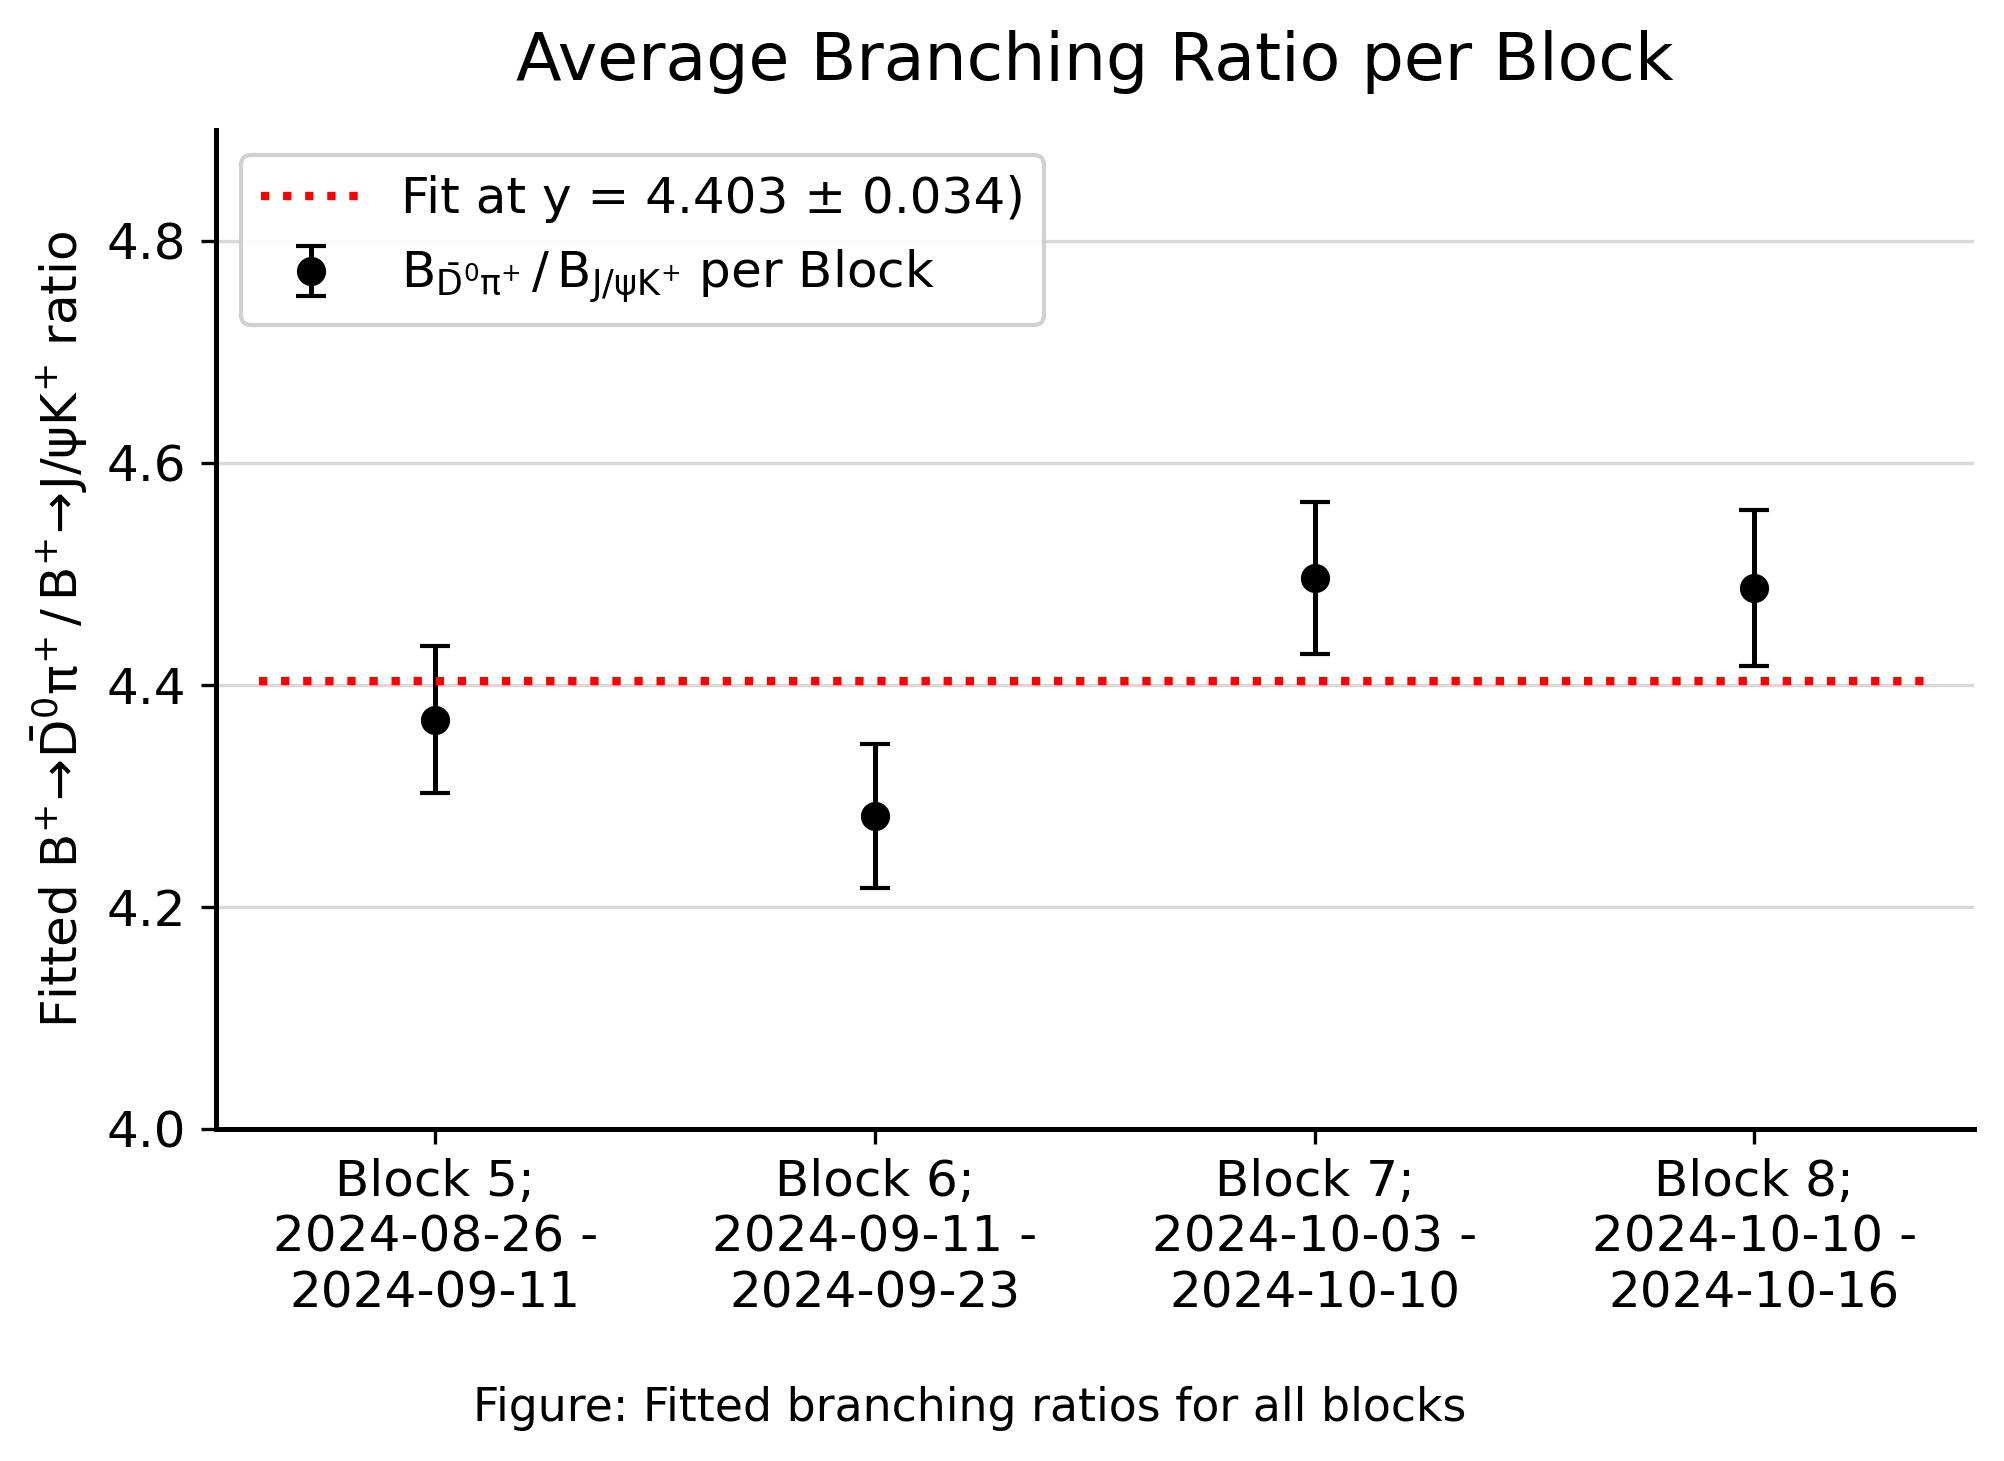

In [2]:
# ratio_plot.py
import numpy as np
import matplotlib.pyplot as plt

def fit_constant(y, yerr):
    """Weighted constant fit: returns (ybar, ybar_err, chi2, ndof)."""
    y = np.asarray(y, dtype=float)
    yerr = np.asarray(yerr, dtype=float)
    w = 1.0 / (yerr**2)
    ybar = np.sum(w * y) / np.sum(w)
    ybar_err = np.sqrt(1.0 / np.sum(w))
    # chi2 for constant hypothesis
    chi2 = np.sum(((y - ybar) / yerr) ** 2)
    ndof = len(y) - 1
    return ybar, ybar_err, chi2, ndof

def plot_block_ratios(
    blocks,               # e.g. ["Block 5;\n2024-08-26 -\n2024-09-11", ...]
    ratios,               # central values per block
    ratio_errs,           # 1σ uncertainties per block
    *,
    title=r"Average $N_{\bar{D}^{0}\pi^{+}} \,/\, N_{J/\psi K^{+}}$ per block",
    ylabel=r"Fitted $B^{+}\!\to\!\bar{D}^{0}\pi^{+}\,/\,B^{+}\!\to\!J/\psi K^{+}$ ratio",
    ylimits=(3.5, 4.5),   # change to taste
    caption="Figure: Fitted yield ratios for all blocks, not corrected for efficiency",
    figwidth=7.2, figheight=5.0,
    outfile=None          # e.g. "ratios_blocks.png"
):
    blocks = list(blocks)
    ratios = np.asarray(ratios, dtype=float)
    ratio_errs = np.asarray(ratio_errs, dtype=float)

    # --- constant fit
    ybar, ybar_err, chi2, ndof = fit_constant(ratios, ratio_errs)
    #fit_label = f"Fit at y = {ybar:.3f} ± {ybar_err:.3f}   (χ²/ndof = {chi2:.2f}/{ndof})"
    fit_label = f"Fit at y = {ybar:.3f} ± {ybar_err:.3f})"

    # --- figure style
    plt.rcParams.update({
        "figure.dpi": 300,
        "savefig.dpi": 300,
        "axes.linewidth": 1.2,
        "axes.grid": True,
        "grid.color": "#C0C0C0",
        "grid.linestyle": "-",
        "grid.alpha": 0.6,
        "font.size": 12,
        "mathtext.default": "regular",
    })

    fig, ax = plt.subplots(figsize=(figwidth, figheight))

    # x positions
    x = np.arange(len(blocks))

    # errorbar points (black dots with vertical error bars)
    ax.errorbar(
        x, ratios, yerr=ratio_errs,
        fmt="o", color="black", ecolor="black", elinewidth=1.2,
        capsize=3.5, markersize=6, label=r"$B_{\bar{D}^{0}\pi^{+}} \,/\, B_{J/\psi K^{+}}$ per Block"
    )

    # horizontal fitted line across full width
    ax.hlines(ybar, x.min()-0.4, x.max()+0.4, colors="red", linestyles="dotted", linewidth=2.0,
              label=fit_label)

    # axes cosmetics
    ax.set_xlim(-0.5, len(blocks)-0.5)
    if ylimits is not None:
        ax.set_ylim(*ylimits)

    ax.set_title(title, pad=12, fontsize=16)
    ax.set_ylabel(ylabel)

    # tick labels as multi-line block labels (keep the line breaks you pass in)
    ax.set_xticks(x, blocks)

    # light horizontal gridlines
    ax.yaxis.grid(True)
    ax.xaxis.grid(False)

    # clean spines
    for spine in ("top", "right"):
        ax.spines[spine].set_visible(False)

    # legend (white box with slight alpha)
    leg = ax.legend(loc="upper left", frameon=True)
    leg.get_frame().set_alpha(0.9)

    # caption under the plot
    fig.text(0.5, 0.01, caption, ha="center", va="bottom", fontsize=11)

    fig.tight_layout(rect=(0.04, 0.05, 0.99, 0.98))

    if outfile:
        fig.savefig(outfile, bbox_inches="tight")
    return fig, ax, (ybar, ybar_err, chi2, ndof)


# ---------- Example usage ----------
if __name__ == "__main__":
    blocks = [
        "Block 5;\n2024-08-26 -\n2024-09-11",
        "Block 6;\n2024-09-11 -\n2024-09-23",
        "Block 7;\n2024-10-03 -\n2024-10-10",
        "Block 8;\n2024-10-10 -\n2024-10-16",
    ]
    ratios =    [4.368490772261887, 4.281841876451816, 4.496149822974217, 4.487390537272466]   # replace with your values
    ratio_errs = [0.06604804315120395, 0.06488151161676337, 0.06882261680135787, 0.07020909838431845]  # …and your 1σ errors

    title = r"Average Branching Ratio per Block"
    caption = "Figure: Fitted branching ratios for all blocks"
    ylimits = (4, 4.9)  # tweak y-scale here

    fig, ax, fit = plot_block_ratios(
        blocks, ratios, ratio_errs,
        title=title,
        caption=caption,
        ylimits=ylimits,
        outfile="block_ratios.png",
    )
    print(f"Weighted mean = {fit[0]:.6f} ± {fit[1]:.6f}  (chi2/ndof = {fit[2]:.2f}/{fit[3]})")
    plt.show()



In [6]:
import numpy as np

def weighted_average(values, errors):
    values = np.array(values, dtype=float)
    errors = np.array(errors, dtype=float)
    weights = 1 / errors**2
    avg = np.sum(weights * values) / np.sum(weights)
    avg_err = np.sqrt(1 / np.sum(weights))
    return avg, avg_err

# Your values
ratios =    [4.368490772261887, 4.281841876451816, 4.496149822974217, 4.487390537272466]
ratio_errs = [0.06604804315120395, 0.06488151161676337, 0.06882261680135787, 0.07020909838431845]

avg, avg_err = weighted_average(ratios, ratio_errs)
print(f"Weighted average = {avg:.6f} ± {avg_err:.6f}")


Weighted average = 4.403107 ± 0.033695


In [9]:
import numpy as np

ratios = [4.368490772261887, 4.281841876451816, 4.496149822974217, 4.487390537272466]

# Mean value
mean_ratio = np.mean(ratios)

# Standard deviation of the values (spread around mean)
spread = np.std(ratios, ddof=1)  # sample std dev

print(f"Average = {mean_ratio:.6f}")
print(f"Std deviation = {spread:.6f}")


Average = 4.408468
Std deviation = 0.102550
